# Building a Deep Learning Model Using the Reuters Dataset

In this report, we will develop a deep learning model to classify newswires into different topics using the Reuters dataset. This process follows the workflow outlined in "Deep Learning with Python" by François Chollet.​

reference url: "https://www.manning.com/books/deep-learning-with-python"

First and foremost, we will import necessary libraries and load the Reuters dataset.

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__, '')

2.14.0 


## 1. Introduction to the Reuters Dataset

The Reuters dataset is a collection of short newswires and their corresponding topics, published by Reuters in 1986. It is a widely used benchmark for text classification tasks, encompassing 46 distinct topics. Some topics are more prevalent than others, but each has at least 10 examples in the training set. This dataset is included in Keras and can be readily loaded for modeling purposes.

reference url: "https://keras.io/api/datasets/reuters/"

### 1.1 Loading the Dataset

In [26]:
# Load data with 80-20 train-test split
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(f"Training samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")

Training samples: 8982
Testing samples: 2246


## 2. Preparing the Data

We begin by loading the Reuters dataset from Keras, which provides pre-split training and test sets. The data consists of lists of integers, where each integer represents a word index in a dictionary. To prepare the data for the neural network, we need to vectorize the sequences and encode the labels.

### 2.1 Vectorizing the Data

Since the data consists of lists of integers (word indices), we need to convert them into numerical tensors. We use one-hot encoding to represent each newswire as a vector.

The code for vectorizing is taken from CM3015 Machine Learning and Neural Networks course.

In [27]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

### 2.2 Encoding the Labels

Since we have 46 distinct labels, we use one-hot encoding for our target labels.

In [28]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## 3. Building the Neural Network

The model consists of fully connected (Dense and Dropout) layers with ReLU activation functions.

The code for building the neural network is taken from CM3015 Machine Learning and Neural Networks course.

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

## 4. Compiling the Model

In [30]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## 5. Validating the Model

We will set aside a portion of the training data as a validation set to monitor performance.

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## 6. Training the Model

In [32]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.3149 - accuracy: 0.5252 - val_loss: 1.5848 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.3361 - accuracy: 0.7146 - val_loss: 1.2774 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0157 - accuracy: 0.7831 - val_loss: 1.1210 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.7921 - accuracy: 0.8401 - val_loss: 1.0106 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6302 - accuracy: 0.8746 - val_loss: 0.9624 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5052 - accuracy: 0.8956 - val_loss: 0.9304 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4051 - accuracy: 0.9174 - val_loss: 0.9100 - val_accuracy: 0.8180
Epoch 8/20
16

### 6.1 Visualizing Training Progress

We plot the loss and accuracy over epochs to analyze the training process.

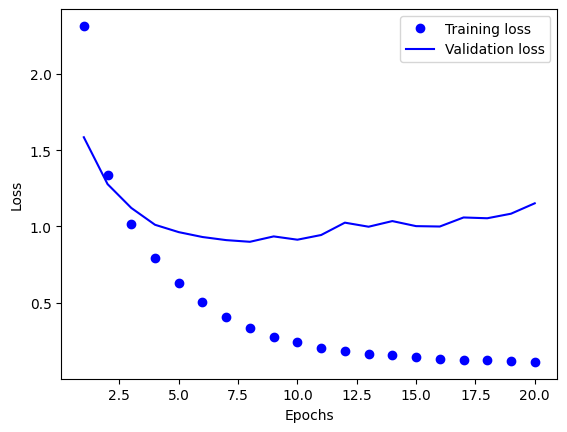

In [33]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 7. Evaluating the Model

In [34]:
test_loss, test_acc = model.evaluate(x_test, one_hot_test_labels)
print(f"Test accuracy: {test_acc}")

71/71 [==============================] - 1s 7ms/step - loss: 1.3085 - accuracy: 0.7792
Test accuracy: 0.7791629433631897


## 8. Making Predictions

In [35]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

print(f"Predicted classes: {predicted_classes}")
print(f"Actual classes: {test_labels}")

71/71 [==============================] - 0s 2ms/step
Predicted classes: [3 1 1 ... 3 4 1]
Actual classes: [ 3 10  1 ...  3  3 24]


## 9. Conclusion